# Information Theory Fundamentals

**Basics**
* Likely events have low information content
* Less likely evets have higher information content
* Independent events have additive information content
* Self information of an event $x$ equals:
$$
I(x) = -\log P(x)
$$
* $\log$ means logarithm with base $e$, thus the $I(x)$ is in units of nats
* 1 nat equals the amount of information gained by observing an event of probability $\frac{1}{e}$

**Shannon Entropy**
* Self-information $I(x)$ deals with the single outcome only
* Shannon Entropy quantifies the uncertainty of an entire probability distribution
$$
H(x) = -\mathbb{E}_{x\sim P}\left[ \log P(x) \right]
$$
* It is the expected amount of information in an event drawn from that distribution
* Gives the LB on the number of bits needed on average to encode symbols drawn from the distribution $P$.
* Nearly deterministic distributions - low entropy
* Uniform distributions - high entropy
* **Differential entropy** - x is continous

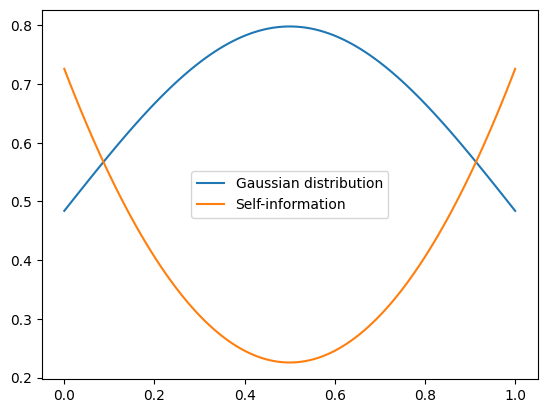

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def gaussian(x, mu, sigma):
    return (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma)**2)

## Self-information visualization for gaussian distribution
x = np.linspace(0, 1, 100)
gaussian_distribution = gaussian(x, 0.5, 0.5)
y = -np.log(gaussian_distribution)

plt.plot(x, gaussian_distribution, label='Gaussian distribution')
plt.plot(x, y, label='Self-information')
plt.legend()
plt.show()

## Kullback-Leibler divergence
* Two probability distributions $P(x)$ and $Q(x)$ are separated over the same random variable $x$
* We can measure the difference between those two probability distributions
$$
D_{\text{KL}}(P||Q) = \mathbb{E}_{x\sim P} \left[ \log \frac{P(x)}{Q(x)} \right] = \mathbb{E}_{x\sim P} \left[ \log P(x) - \log Q(x) \right]
$$
* Shows the amount of nats needed to send a message containing symbols drawn from $P$, when we use a code that was designed to minimize the length of messages drawn from $Q$

**Properties**
* Non-negative
* $\text{KL} = 0$ if $P$ and $Q$ are the same distribution in case of discrete variables, or equal "almost everywhere" in the case of continous variables
* Does not necessarily mean distance between distributions as KL is not symmetrics

**Cross-Entropy**
$$
H(P,Q) = -\mathbb{E}_{x\sim P} \log Q(x)
$$
* Minimizsing cross-entropy with respect to Q is equal to minimizing the KL as P is omitted

<>:22: SyntaxWarning: invalid escape sequence '\s'
<>:22: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_39473/68699846.py:22: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_title(f"KL Divergence $D_{{KL}}(P || Q) \sim {total_kl:.4f}$")


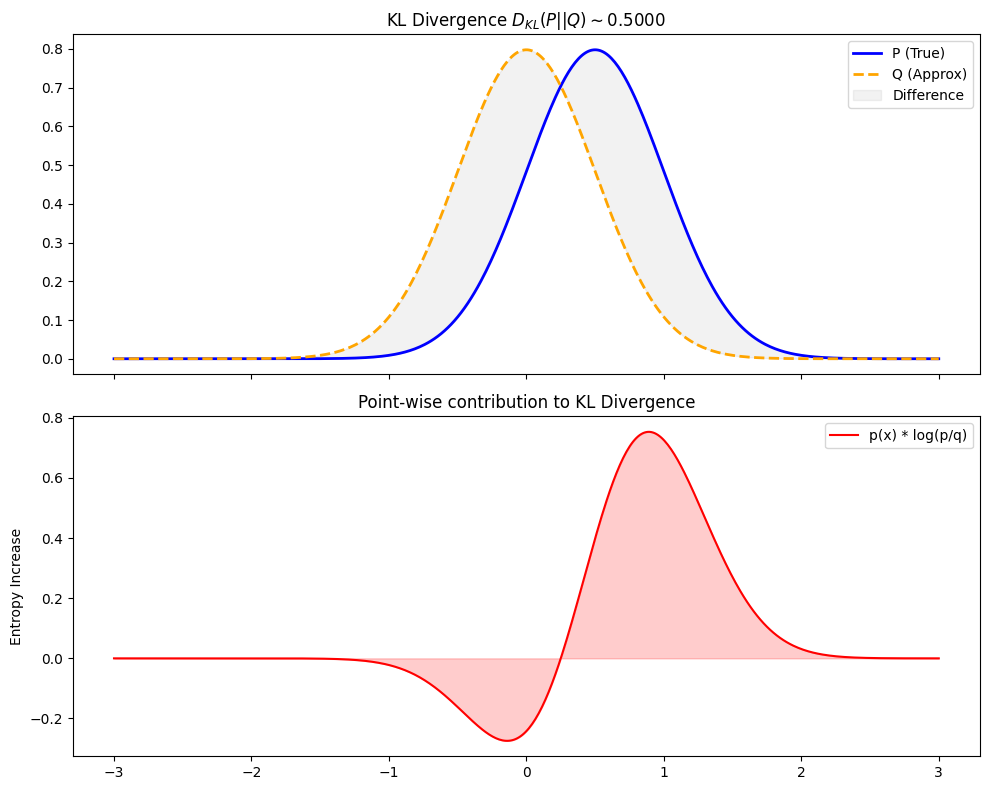

In [ ]:
### Kullback-Leibler divergence visualization

# Setup
x = np.linspace(-3, 3, 500)
p = gaussian(x, 0.5, 0.5)
q = gaussian(x, 0, 0.5)

# 1. Calculate KL Divergence point-wise: p(x) * log(p(x)/q(x))
# (tiny 1e-10 to avoid log(0))
kl_elementwise = p * np.log((p + 1e-10) / (q + 1e-10))

# 2. Total KL Divergence (area under kl_elementwise curve)
total_kl = np.trapezoid(kl_elementwise, x)

# 3. Visualization
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Top Plot: The Distributions
ax1.plot(x, p, label='P (True)', color='blue', lw=2)
ax1.plot(x, q, label='Q (Approx)', color='orange', lw=2, linestyle='--')
ax1.fill_between(x, p, q, color='gray', alpha=0.1, label='Difference')
ax1.set_title(f"KL Divergence $D_{{KL}}(P || Q) \sim {total_kl:.4f}$")
ax1.legend()

# Bottom Plot: What KL is actually measuring
ax2.plot(x, kl_elementwise, color='red', label='p(x) * log(p/q)')
ax2.fill_between(x, kl_elementwise, color='red', alpha=0.2)
ax2.set_title("Point-wise contribution to KL Divergence")
ax2.set_ylabel("Entropy Increase")
ax2.legend()

plt.tight_layout()
plt.show()


<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\l'
<>:27: SyntaxWarning: invalid escape sequence '\s'
<>:31: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipykernel_39473/4003731629.py:27: SyntaxWarning: invalid escape sequence '\s'
  ax1.set_title(f"Cross-Entropy $H(P, Q) \sim {cross_entropy:.4f}$\n(Entropy {entropy_p:.3f} + KL {kl_div:.3f})")
/tmp/ipykernel_39473/4003731629.py:31: SyntaxWarning: invalid escape sequence '\l'
  ax2.plot(x, ce_elementwise, color='purple', label='$-p(x) \log q(x)$')


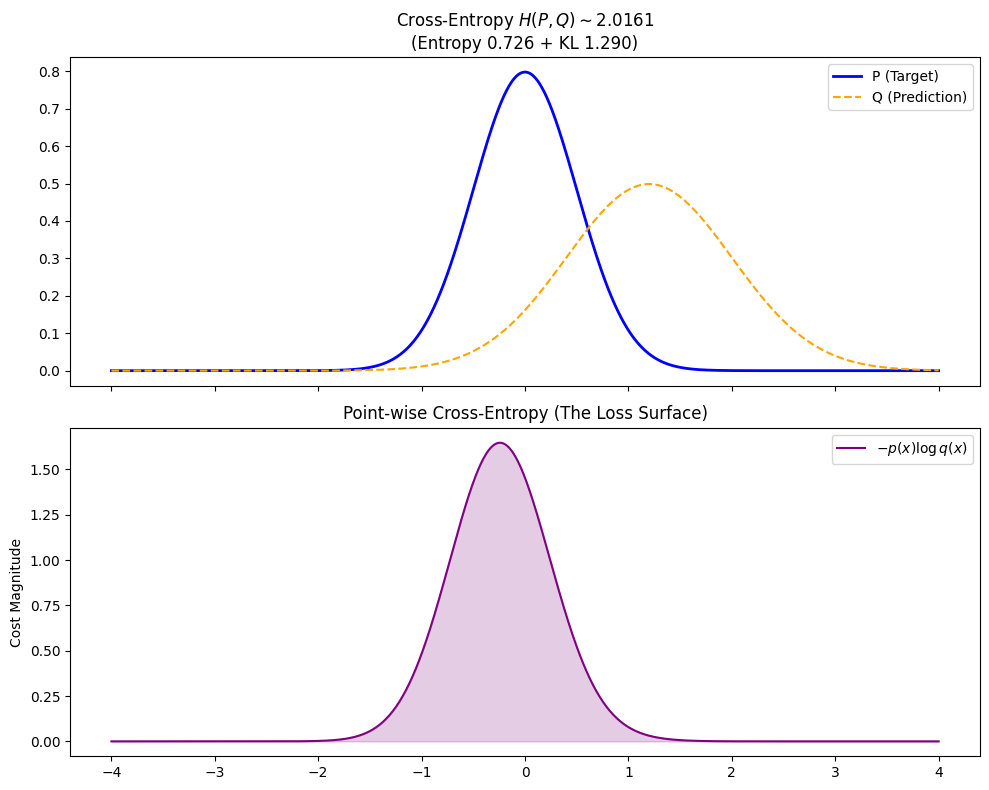

In [ ]:
### Cross-entropy visualization

# 0. Setup
x = np.linspace(-4, 4, 1000)
p = gaussian(x, 0, 0.5)      # True Distribution (Target)
q = gaussian(x, 1.2, 0.8)    # Prediction (Approximation)

# 1. Calculations
# Entropy H(P)
entropy_p = -np.trapezoid(p * np.log(p + 1e-10), x)

# KL Divergence D_KL(P||Q)
kl_div = np.trapezoid(p * np.log((p + 1e-10) / (q + 1e-10)), x)

# Cross-Entropy H(P,Q) = H(P) + KL
cross_entropy = entropy_p + kl_div

# Point-wise Cross-Entropy: -p(x) * log(q(x))
ce_elementwise = -p * np.log(q + 1e-10)

# 2. Plotting
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8), sharex=True)

# Top Plot: Distributions
ax1.plot(x, p, label='P (Target)', color='blue', lw=2)
ax1.plot(x, q, label='Q (Prediction)', color='orange', linestyle='--')
ax1.set_title(f"Cross-Entropy $H(P, Q) \sim {cross_entropy:.4f}$\n(Entropy {entropy_p:.3f} + KL {kl_div:.3f})")
ax1.legend()

# Bottom Plot: Point-wise Cost
ax2.plot(x, ce_elementwise, color='purple', label='$-p(x) \log q(x)$')
ax2.fill_between(x, ce_elementwise, color='purple', alpha=0.2)
ax2.set_ylabel("Cost Magnitude")
ax2.set_title("Point-wise Cross-Entropy (The Loss Surface)")
ax2.legend()

plt.tight_layout()
plt.show()